In [2]:
#Costumer Segmentation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from matplotlib.image import imread
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
sns.set_theme() # pour modifier le thème

df = pd.read_csv('Sample - Superstore.csv',header=0, encoding='ISO-8859-1', parse_dates=[0], index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount     

/var/folders/7f/1dyw4vh16jx3zq7t266nc56m0000gn/T/ipykernel_17350/1701233624.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('Sample - Superstore.csv',header=0, encoding='ISO-8859-1', parse_dates=[0], index_col=0)


In [3]:
#cleaning
#df = df.drop(['Row ID','Order ID', 'Segment', 'Ship Date', 'Customer ID', 'Customer Name', 'Country', 'Postal Code', 'Product ID','Product Name'], axis=1)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df = df.sort_values(by='Order Date')
df['date_as_float'] = df['Order Date'].astype(int) / 10**9

dflog = df[['date_as_float', 'Sales']] #Transformée logarithmique
dflog = np.log(dflog) #Transformée logarithmique

dflog_1 = dflog.diff().dropna() #Differenciation simple 

dflog_2 = dflog_1.diff(periods = 12).dropna()
db = df[['Order Date', 'Sales']]
db = db.sort_values(by='Order Date')
db['Order Date'] = pd.to_datetime(db['Order Date'])
db.set_index('Order Date', inplace=True)
db.tail()


,Sales
Order Date,
2017-12-30,209.300
2017-12-30,3.024
2017-12-30,52.776
2017-12-30,90.930
2017-12-30,323.136


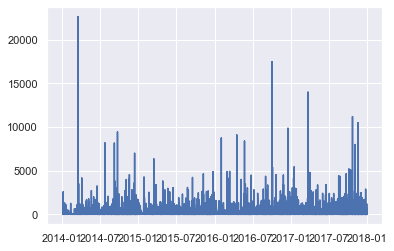

In [59]:
plt.plot(db)
plt.savefig("Graph_Segmentation_DecisionTree.png")
plt.show()

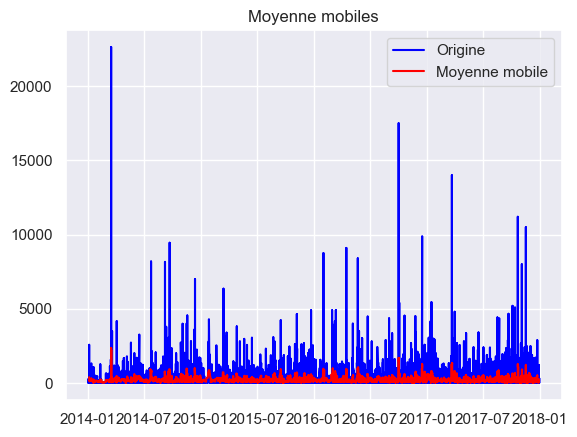

In [4]:
airpass_ma = db.rolling(window = 12, center = True).mean()

#Affichage de la série 

plt.plot(db, color = 'blue', label = 'Origine')
plt.plot(airpass_ma, color = 'red', label = 'Moyenne mobile')
plt.legend()
plt.title('Moyenne mobiles')
plt.show()

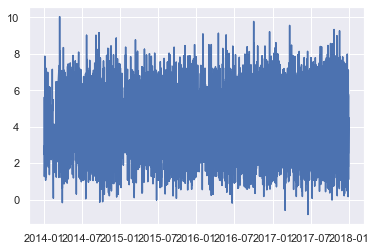

In [33]:
dblog = np.log(db)
plt.plot(dblog);


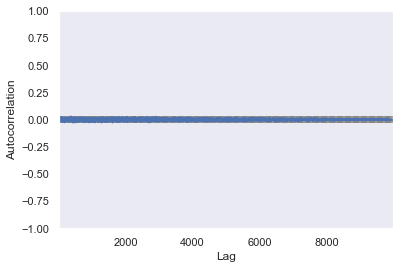

In [37]:
pd.plotting.autocorrelation_plot(dblog);


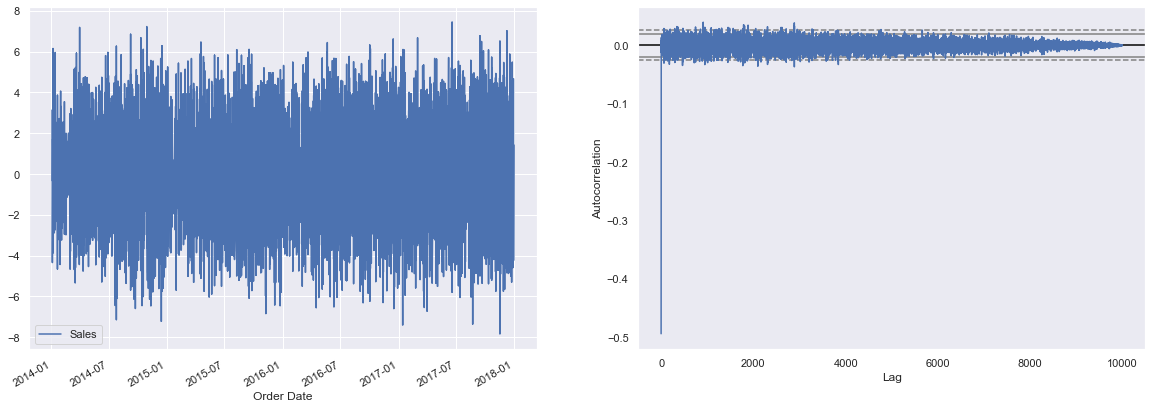

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7)) # Création de la figure et des axes

dblog_1 = dblog.diff().dropna() # Différenciation ordre 1

dblog_1.plot(ax = ax1) #Série temporelle différenciée

pd.plotting.autocorrelation_plot(dblog_1, ax = ax2); #Autocorrélogramme de la série différenciée


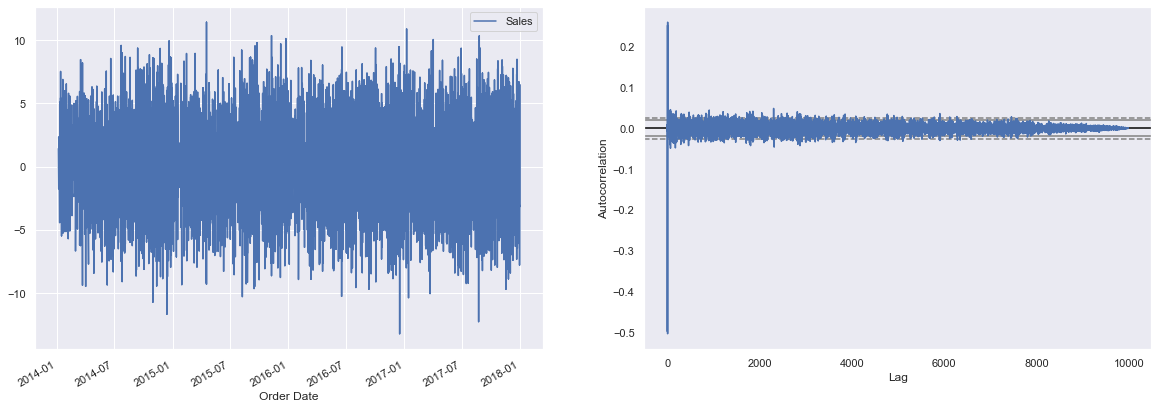

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7)) #Création de la figure et des axes

dblog_2 = dblog_1.diff(periods = 12).dropna() #Différenciation d'ordre 12

dblog_2.plot(ax = ax1) #Série doublement différenciée

pd.plotting.autocorrelation_plot(dblog_2, ax = ax2); #Autocorrélogramme de la série


/Users/dalvikloger/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


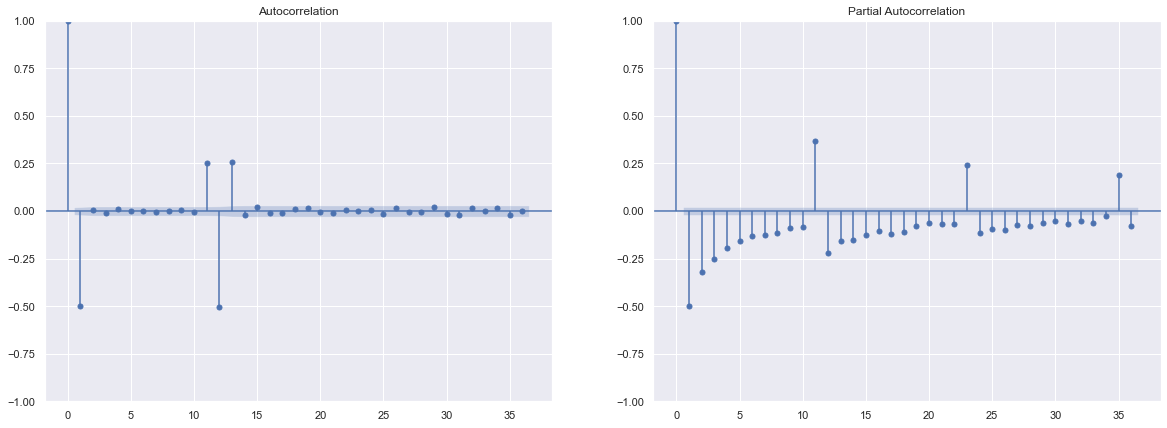

In [42]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))

plot_acf(dblog_2, lags = 36, ax=ax1)
plot_pacf(dblog_2, lags = 36, ax=ax2)
plt.show()

In [44]:
import statsmodels.api as sm
model=sm.tsa.SARIMAX(db['Sales'],order=(1,1,1),seasonal_order=(0,1,1,12))
sarima=model.fit()
print(sarima.summary())

/Users/dalvikloger/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dalvikloger/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.06655D+00    |proj g|=  6.13434D-02


 This problem is unconstrained.



At iterate    5    f=  8.01847D+00    |proj g|=  3.94990D-03

At iterate   10    f=  8.00847D+00    |proj g|=  5.94155D-03

At iterate   15    f=  7.85982D+00    |proj g|=  1.75018D-02

At iterate   20    f=  7.85503D+00    |proj g|=  2.30445D-03

At iterate   25    f=  7.85498D+00    |proj g|=  1.57449D-03

At iterate   30    f=  7.85495D+00    |proj g|=  5.77837D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     60      1     0     0   5.747D-04   7.855D+00
  F =   7.8549470587152488     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                 9994
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood              -78502.341
Date:                            Tue, 05 Dec 2023   AIC                         157012.682
Time:                                    17:26:06   BIC    

In [56]:
model = sm.tsa.SARIMAX(dflog['Sales'],order=(0,1,1),seasonal_order=(0,1,1,12))
sarima=model.fit()
print(sarima.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.13139D+00    |proj g|=  1.86831D-01

At iterate    5    f=  1.95099D+00    |proj g|=  4.05529D-02

At iterate   10    f=  1.92106D+00    |proj g|=  2.03280D-03

At iterate   15    f=  1.91848D+00    |proj g|=  7.20816D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     39      2     0     0   7.321D-05   1.918D+00
  F =   1.9184472789611871     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                 9994
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood              -19172.962
Date:                            Sun, 03 Dec 2023   AIC                          38351.924
Time:                                    19:24:12   BIC    

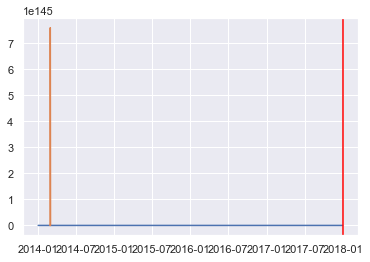

In [46]:
import datetime
pred = np.exp(sarima.predict(132, 143))#Prédiction et passage à l'exponentielle

dbpred = pd.concat([db, pred])#Concaténation des prédictions

plt.plot(dbpred) #Visualisation

plt.axvline(x= datetime.date(2018,1,1), color='red'); # Ajout de la ligne verticale


/Users/dalvikloger/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


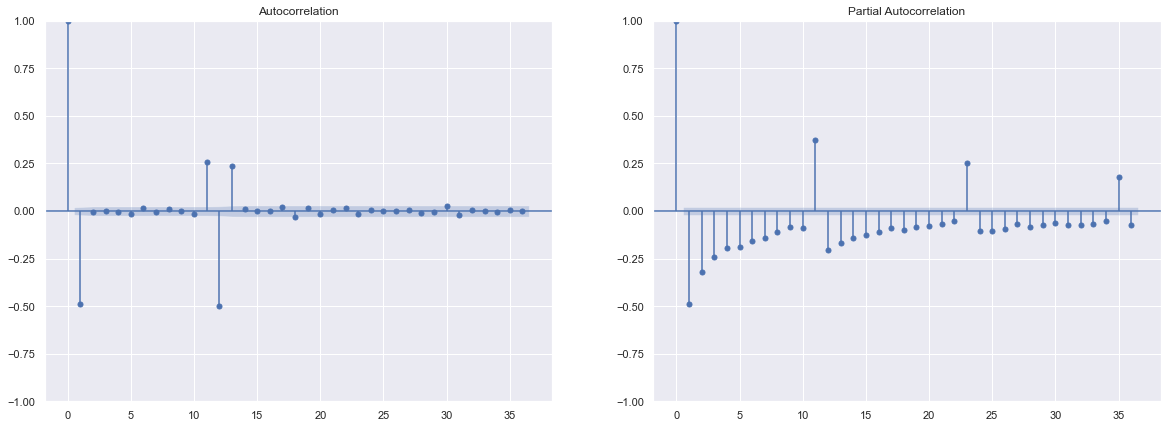

In [76]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))

plot_acf(dflog_2['Sales'], lags = 36, ax=ax1)
plot_pacf(dflog_2['Sales'], lags = 36, ax=ax2)
plt.show()

17:37:12 - cmdstanpy - INFO - Chain [1] start processing
17:37:12 - cmdstanpy - INFO - Chain [1] done processing


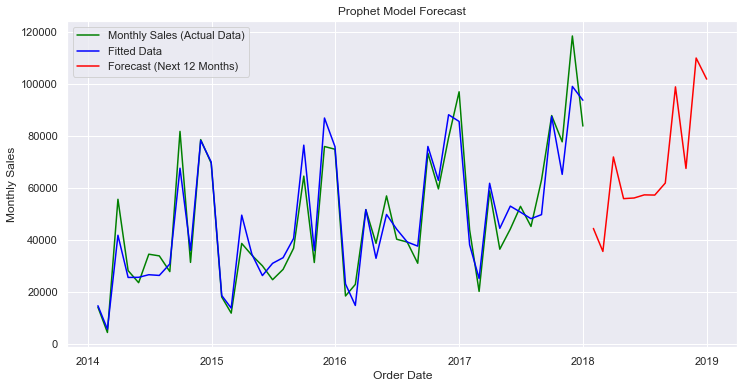

R-squared score for fitted data: 0.92


In [53]:
df_copy = df[['Order Date', 'Sales']].copy()

from prophet import Prophet

df_copy['Order Date'] = pd.to_datetime(df_copy['Order Date'])

# Resample the data to monthly frequency and sum the sales for each month
monthly_data = df_copy.resample('M', on='Order Date').sum()

# Rename columns as 'ds' and 'y' as required by Prophet
monthly_data.reset_index(inplace=True)
monthly_data = monthly_data.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Initialize and fit the Prophet model
model = Prophet()
model.fit(monthly_data)

# Create a future dataframe for the next 12 months
future = model.make_future_dataframe(periods=12, freq='M')

# Make forecasts for the future
forecast = model.predict(future)

# Extract the actual data and forecast for the next 12 months
actual_data = monthly_data['y']
fitted_data = forecast['yhat'][:len(monthly_data)]  # Fitted values for the historical data
forecast_data = forecast['yhat'][len(monthly_data):]

# Calculate R-squared score for the fitted data
r2_fitted = 1 - np.sum((actual_data - fitted_data) ** 2) / np.sum((actual_data - actual_data.mean()) ** 2)

# Plot the actual data, fitted data, and forecast for the next 12 months
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['ds'], actual_data, label='Monthly Sales (Actual Data)', color='green')
plt.plot(monthly_data['ds'], fitted_data, label='Fitted Data', color='blue')
plt.plot(forecast['ds'][len(monthly_data):], forecast_data, label='Forecast (Next 12 Months)', color='red')

plt.legend()
plt.xlabel('Order Date')
plt.ylabel('Monthly Sales')
plt.title('Prophet Model Forecast')
plt.show()

# Display R-squared score for the fitted data
print(f"R-squared score for fitted data: {r2_fitted:.2f}")

In [54]:
df_copy = df[['Order Date', 'Sales']].copy()

df_copy['Order Date'] = pd.to_datetime(df_copy['Order Date'])

# Resample the data to monthly frequency and sum the sales for each month
monthly_data = df_copy.resample('M', on='Order Date').sum()

monthly_data.reset_index(inplace=True)

# Initialize and fit the Prophet model
import statsmodels.api as sm
model=sm.tsa.SARIMAX(monthly_data,order=(1,1,1),seasonal_order=(0,1,1,12))
sarima=model.fit()


# Create a future dataframe for the next 12 months
future = model.make_future_dataframe(periods=12, freq='M')

# Make forecasts for the future
forecast = model.predict(future)

# Extract the actual data and forecast for the next 12 months
actual_data = monthly_data['y']
fitted_data = forecast['yhat'][:len(monthly_data)]  # Fitted values for the historical data
forecast_data = forecast['yhat'][len(monthly_data):]

# Calculate R-squared score for the fitted data
r2_fitted = 1 - np.sum((actual_data - fitted_data) ** 2) / np.sum((actual_data - actual_data.mean()) ** 2)

# Plot the actual data, fitted data, and forecast for the next 12 months
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['ds'], actual_data, label='Monthly Sales (Actual Data)', color='green')
plt.plot(monthly_data['ds'], fitted_data, label='Fitted Data', color='blue')
plt.plot(forecast['ds'][len(monthly_data):], forecast_data, label='Forecast (Next 12 Months)', color='red')

plt.legend()
plt.xlabel('Order Date')
plt.ylabel('Monthly Sales')
plt.title('Prophet Model Forecast')
plt.show()

# Display R-squared score for the fitted data
print(f"R-squared score for fitted data: {r2_fitted:.2f}")

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10908D+01    |proj g|=  7.93446D-02

At iterate    5    f=  1.10801D+01    |proj g|=  1.78270D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6      8      1     0     0   1.783D-05   1.108D+01
  F =   11.080131106738365     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


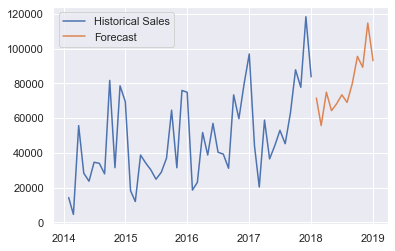

In [57]:
import pandas as pd
import statsmodels.api as sm
from pmdarima import auto_arima

# Chargement des données
df_copy = df[['Order Date', 'Sales']].copy()
df_copy['Order Date'] = pd.to_datetime(df_copy['Order Date'])

# Resample des données à une fréquence mensuelle et somme des ventes pour chaque mois
monthly_data = df_copy.resample('M', on='Order Date').sum()

# Utilisation de pmdarima pour sélectionner l'ordre optimal
auto_model = auto_arima(monthly_data['Sales'], seasonal=True, m=12)
order = auto_model.get_params()['order']
seasonal_order = auto_model.get_params()['seasonal_order']

# Initialisation et ajustement du modèle SARIMA
model = sm.tsa.SARIMAX(monthly_data['Sales'], order=order, seasonal_order=seasonal_order)
sarima = model.fit()

# Création d'un dataframe futur pour les 12 prochains mois
future = pd.date_range(start=monthly_data.index[-1], periods=13, freq='M')[1:]
future_df = pd.DataFrame({'Order Date': future})

# Prévisions pour le futur
forecast = sarima.get_forecast(steps=12)
forecast_index = pd.DataFrame(index=future, data={'Forecast': forecast.predicted_mean})

# Visualisation des résultats
plt.plot(monthly_data['Sales'], label='Historical Sales')
plt.plot(forecast_index['Forecast'], label='Forecast')
plt.legend()
plt.savefig("prediction.png")
plt.show()
